# Predicting Survival in the Titanic Data Set
**Decision Tree Classifier in Python using Scikit-learn**

The root node (the first decision node) partitions the data based on the most influential feature partitioning. There
are 2 measures for this, Gini Impurity and Entropy.

Entropy The root node (the first decision node) partitions the data using the feature that provides the most information gain.

Information gain tells us how important a given attribute of the feature vectors is.

It is calculated as:

Information Gain=entropy(parent)–[average entropy(children)] Where entropy is a common measure of target class impurity, 
given as:

Entropy=Σi–pilog2pi where i is each of the target classes.

Gini Impurity Gini Impurity is another measure of impurity and is calculated as follows:

Gini=1–Σip2i Gini impurity is computationally faster as it doesn’t require calculating logarithmic functions, though in 
reality which of the two methods is used rarely makes too much of a difference.

In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
df = pd.read_csv('train.csv')#index_col='PassengerId' )

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df=df.set_index('PassengerId')

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will be using Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict
whether a passenger survived.

In [14]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [16]:
df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,0
2,1,female,38.0,1,0,71.2833,1
3,3,female,26.0,0,0,7.9250,1
4,1,female,35.0,1,0,53.1000,1
5,3,male,35.0,0,0,8.0500,0
6,3,male,NaN,0,0,8.4583,0
7,1,male,54.0,0,0,51.8625,0
8,3,male,2.0,3,1,21.0750,0
9,3,female,27.0,0,2,11.1333,1


We need to convert ‘Sex’ into an integer value of 0 or 1.

In [18]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [20]:
df.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1


We will also drop any rows with missing values.You can use the isna() method then sum to count the NaN values.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Survived    891 non-null int64
dtypes: float64(2), int64(5)
memory usage: 55.7 KB


In [22]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [23]:
df.shape

(891, 7)

In [24]:
df.size

6237

In [25]:
df.count()

Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Survived    891
dtype: int64

In [27]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


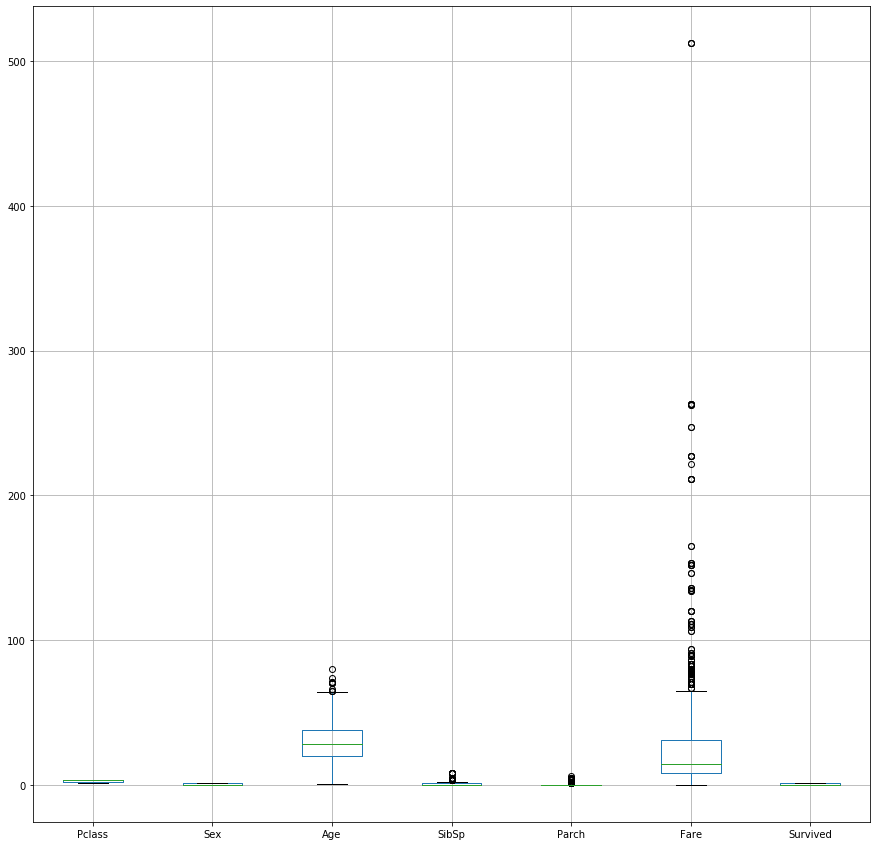

In [28]:
df.boxplot(figsize=(15,15))

In [29]:
df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Sex,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.543351
Age,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,1.000000


We will also drop any rows with missing values.

In [30]:
df = df.dropna()
df.count()

Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
Fare        714
Survived    714
dtype: int64

Create Target Varibale Dependent & Independent

In [31]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,0,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,3,1,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,3,0,35.0,0,0,8.0500


In [32]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

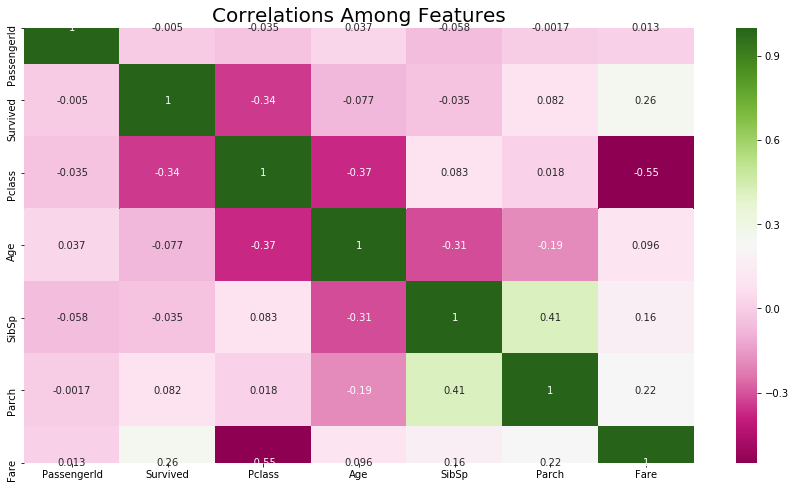

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('train.csv')
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

([<matplotlib.axis.XTick at 0x1fbebac8388>,
 <a list of 3 Text xticklabel objects>)

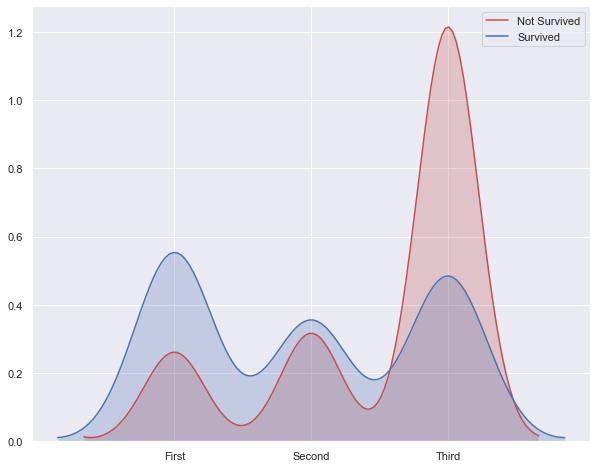

In [23]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()),labels)

Text(0.5, 0, 'Fare')

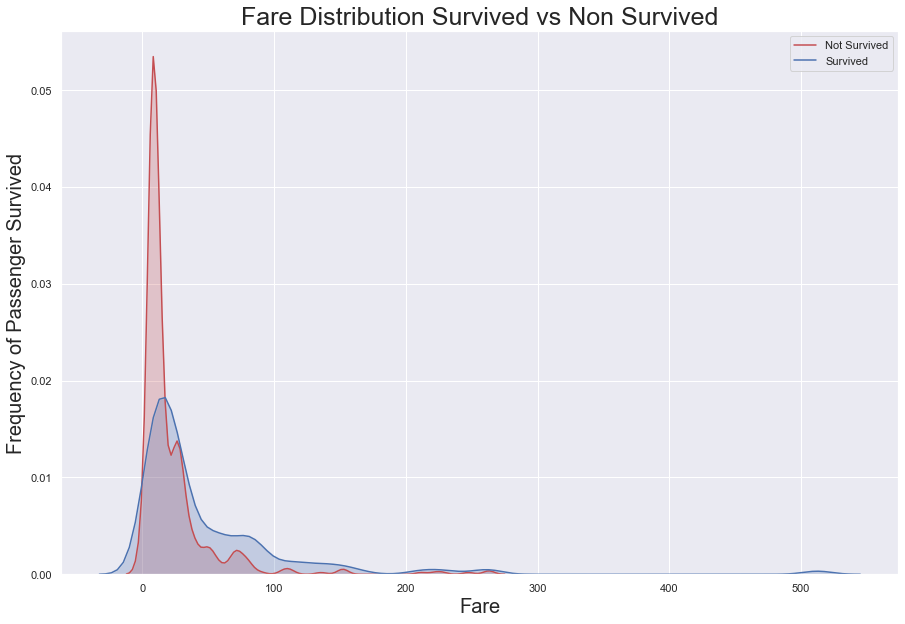

In [24]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

# Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.
Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

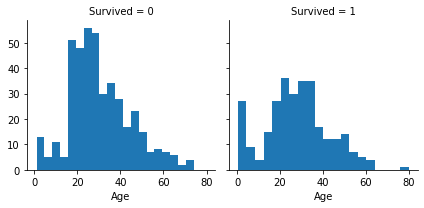

In [55]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Observations:**

1.Infants (Age <=4) had high survival rate.

2.Oldest passengers (Age = 80) survived.

3.Large number of 15-25 year olds did not survive.

4.Most passengers are in 15-35 age range.

# Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations**

Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption.

Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption.

Most passengers in Pclass=1 survived. Confirms our classifying assumption.

Pclass varies in terms of Age distribution of passengers.

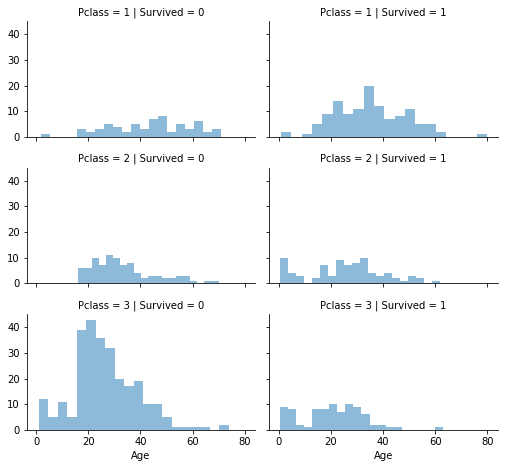

In [57]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


# Train & Test Data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')

In [35]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Defining some of the attributes like max_depth, max_leaf_nodes, min_impurity_split, and min_samples_leaf can help prevent overfitting the model to the training data.

# First we fit our model using our training data.

In [36]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Then we score the predicted output from model on our test data against our ground truth test data.

In [37]:
y_predict = model.predict(X_test)

X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
690,1,1,15.0,0,1,211.3375
279,3,0,7.0,4,1,29.1250
507,2,1,33.0,0,2,26.0000
10,2,1,14.0,1,0,30.0708
495,3,0,21.0,0,0,8.0500


In [38]:
y_predict

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8100558659217877

**We see an accuracy score of ~83.2%, which is significantly better than 50/50 guessing.**

Let’s also take a look at our confusion matrix:

In [40]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,97,15
True Survival,19,48


In [41]:
98+50

148

In [42]:
148/(98+50+14+17)

0.8268156424581006

# Decision Tree 

<img src="tree.png"/>

The root node, with the most information gain, tells us that the biggest factor in determining survival is Sex.

If we zoom in on some of the leaf nodes, we can follow some of the decisions down.

We have already zoomed into the part of the decision tree that describes males, with a ticket lower than first class, that are under the age of 10.

The impurity is the measure as given at the top by Gini, the samples are the number of observations remaining to classify and the value is the how many samples are in class 0 (Did not survive) and how many samples are in class 1 (Survived).

Let’s follow this part of the tree down, the nodes to the left are True and the nodes to the right are False:

We see that we have 19 observations left to classify: 9 did not survive and 10 did. From this point the most information gain is how many siblings (SibSp) were aboard. A. 9 out of the 10 samples with less than 2.5 siblings survived. B. This leaves 10 observations left, 9 did not survive and 1 did. 6 of these children that only had one parent (Parch) aboard did not survive. None of the children aged > 3.5 survived Of the 2 remaining children, the one with > 4.5 siblings did not survive.

**Decision trees are a great tool but they can often overfit the training set of data unless pruned effectively, hindering their predictive capabilities.**